### COVID-19 Comorbidities

**Data Retrieved From:** [Canadian Statistical Geospatial Explorer](https://www150.statcan.gc.ca/n1/pub/71-607-x/2020010/71-607-x2020app-eng.htm)

**Authors:** KT

In [1]:
import os
import pandas as pd
import glob

In [17]:
os.chdir('/Users/kt/Documents/UBC_MDS/capstone/data-599-capstone-statistics-canada/data/comorbidities')

In [18]:
filenames = glob.glob("*.xlsx")

In [40]:
j = pd.read_excel(filenames[0])

In [78]:
como = pd.read_excel(filenames[0])
for f in filenames[1:len(filenames)]:
    new = pd.read_excel(f)
    como = pd.merge(como, new, how = 'inner', on = 'DGUID')

#### Removing non-Ontario entries by DGUID

In [79]:
dguid = j[j['Province/Territory']== 'Ontario']['DGUID'].to_list()
DGUID = j.DGUID.to_list()

def ontario_only(a,b):
    return [x for x in a if x in b]

ontario = ontario_only(DGUID, dguid)

como2 = como[como['DGUID'].isin(ontario)]

In [80]:
for i in filenames:
    f = pd.read_excel(i)
    f2 = f[f['Province/Territory'] == 'Ontario']
    print('length of file after ON filter: {}'.format(len(f2)))

length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36
length of file after ON filter: 36


#### Analysis of Merge

In [81]:
import missingno as msno

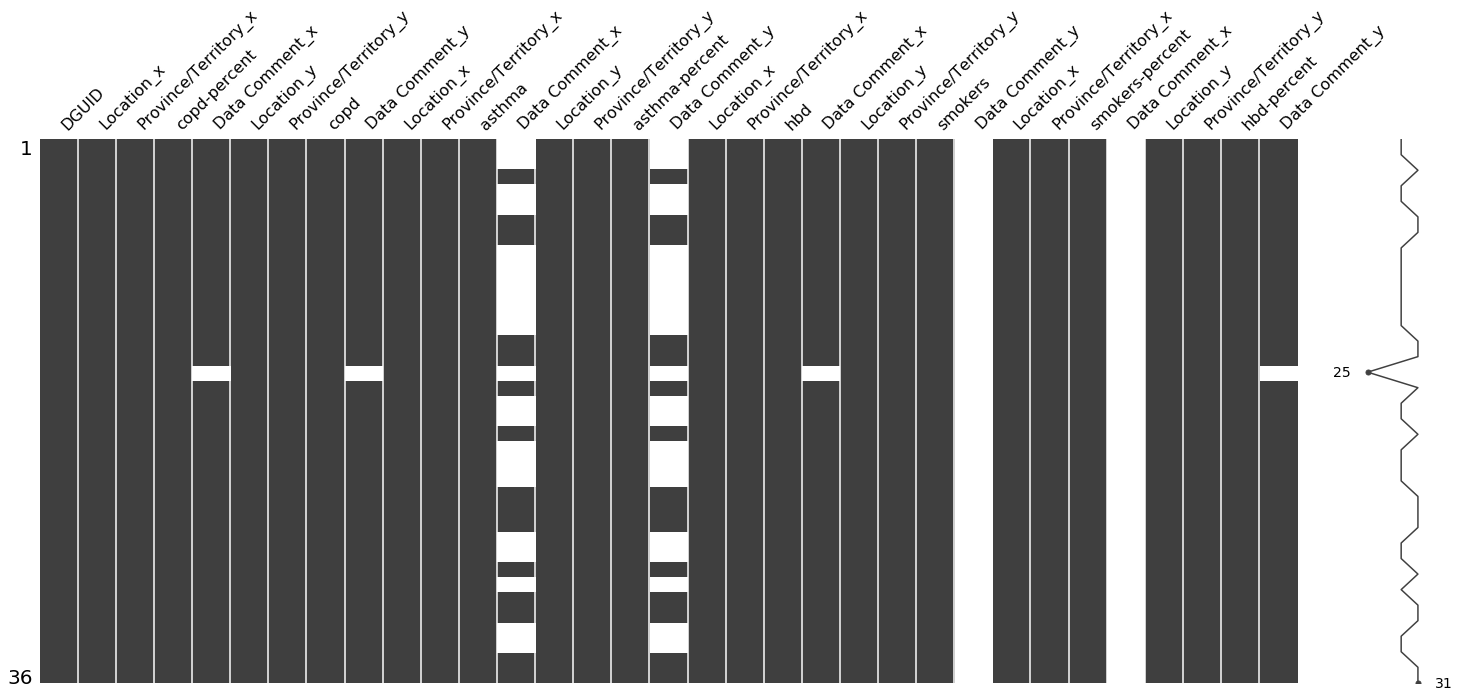

In [82]:
msno.matrix(como2)

In [83]:
como2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 7 to 107
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DGUID                 36 non-null     object
 1   Location_x            36 non-null     object
 2   Province/Territory_x  36 non-null     object
 3   copd-percent          36 non-null     object
 4   Data Comment_x        35 non-null     object
 5   Location_y            36 non-null     object
 6   Province/Territory_y  36 non-null     object
 7   copd                  36 non-null     object
 8   Data Comment_y        35 non-null     object
 9   Location_x            36 non-null     object
 10  Province/Territory_x  36 non-null     object
 11  asthma                36 non-null     object
 12  Data Comment_x        15 non-null     object
 13  Location_y            36 non-null     object
 14  Province/Territory_y  36 non-null     object
 15  asthma-percent        36 non-null     obj

In [99]:
como3 = como2.dropna(axis = 'columns').drop(columns = ['Location_y', 'Province/Territory_y',
                                                      'Province/Territory_x'])

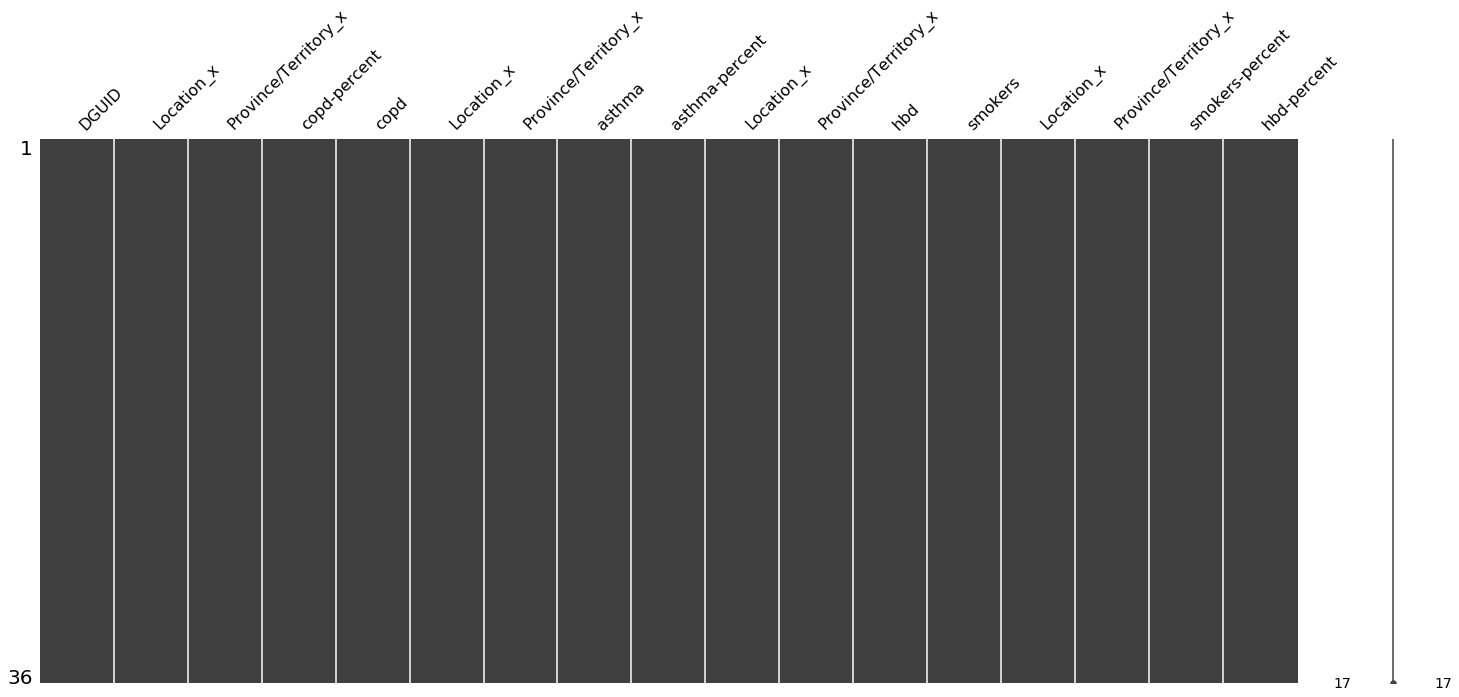

In [75]:
msno.matrix(como3)

---
### Merge with COVID data
---

In [116]:
# remove duplicated column names
como3 = como3.loc[:,~como3.columns.duplicated()]

# rename location to fit covid data
como3.rename(columns = {'Location_x' :'Reporting_PHU'}, inplace = True)

# merge with covid data
covidmerge = pd.merge(como3, covid, on = 'Reporting_PHU')

In [122]:
covidmerge.head()

,DGUID,Reporting_PHU,copd-percent,copd,asthma,asthma-percent,hbd,smokers,smokers-percent,hbd-percent,...,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2017A00073562,Thunder Bay District Health Unit,4.3 %,"3,700","10,400",8.3 %,"3,700","23,000",18.3 %,4.3 %,...,30s,MALE,Neither,Resolved,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2017A00073562,Thunder Bay District Health Unit,4.3 %,"3,700","10,400",8.3 %,"3,700","23,000",18.3 %,4.3 %,...,60s,MALE,Travel-Related,Resolved,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
2,2017A00073562,Thunder Bay District Health Unit,4.3 %,"3,700","10,400",8.3 %,"3,700","23,000",18.3 %,4.3 %,...,60s,FEMALE,Travel-Related,Resolved,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
3,2017A00073562,Thunder Bay District Health Unit,4.3 %,"3,700","10,400",8.3 %,"3,700","23,000",18.3 %,4.3 %,...,60s,MALE,Travel-Related,Resolved,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
4,2017A00073562,Thunder Bay District Health Unit,4.3 %,"3,700","10,400",8.3 %,"3,700","23,000",18.3 %,4.3 %,...,60s,FEMALE,Travel-Related,Resolved,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851


In [123]:
covidmerge.to_csv('covid_comorbidities.csv')